In [1]:
# Import packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
from SeqSpaceDurable_endoN import solveSeqSpaceDurable
import time 

In [2]:
# Time horizon
T = 1000 

# Define a list of variable names and their slice indices
variables = ['Nc', 'Yc', 'w', 'C', 'r', 'N', 'Nx', 'Yx', 'X', 'D', 'Q']

# Initialize dictionaries to hold values for each variable
# Use a loop to create dictionaries dynamically for both endogenous and non-endogenous cases
for var in variables:
    globals()[var] = {}
    globals()[var + 'lvl'] = {}
    globals()[var + 'relold'] = {}
    globals()[var + '_endoN'] = {}
    globals()[var + 'lvl_endoN'] = {}
    globals()[var + 'relold_endoN'] = {}

# Loop over eta and chi values
for eta in [0, 0.5, 1]:
    for chi_value, suffix in [(0, ''), (1, '_endoN')]:
        
        # Solve for Dold and Dnew for each eta and chi combination
        Dold_key = 'Dold' + suffix
        Dnew_key = 'Dnew' + suffix
        
        globals()[Dold_key] = solveSeqSpaceDurable(horizon=T, eta=eta, chi=chi_value)
        globals()[Dold_key].solve_steady_state()
        
        globals()[Dnew_key] = solveSeqSpaceDurable(horizon=T, DC_ratio=10.876, eta=eta, chi=chi_value)
        globals()[Dnew_key].solve_steady_state()

        # Initialize shock variables
        Z = np.zeros((T, 1))
        D0 = np.zeros((T, 1))
        D0[0] = (getattr(globals()[Dold_key], 'Dss') - getattr(globals()[Dnew_key], 'Dss')) / getattr(globals()[Dnew_key], 'Dss')

        shocks = np.vstack((Z, D0))

        # Solve for transition path and flatten it
        Path_key = 'Path' + suffix
        globals()[Path_key] = globals()[Dnew_key].solve_seqspace(shocks).flatten()

        # Fill in each variable's path for the current eta and chi
        for i, var in enumerate(variables):
            var_key = var + suffix
            globals()[var_key][eta] = globals()[Path_key][i * T:(i + 1) * T]

        # Create steady state path
        Pathss = np.zeros((11 * T, 1)).flatten()
        for i, var in enumerate(variables):
            Pathss[i * T:(i + 1) * T] = getattr(globals()[Dnew_key], var + 'ss')

        # Change SS deviation to levels
        Pathlvl_key = 'Pathlvl' + suffix
        globals()[Pathlvl_key] = globals()[Path_key] * Pathss + Pathss
        for i, var in enumerate(variables):
            varlvl_key = var + 'lvl' + suffix
            globals()[varlvl_key][eta] = globals()[Pathlvl_key][i * T:(i + 1) * T]

        # Create old steady state path
        Patholdss = np.zeros((11 * T, 1)).flatten()
        for i, var in enumerate(variables):
            Patholdss[i * T:(i + 1) * T] = getattr(globals()[Dold_key], var + 'ss')

        # Calculate relative to old steady state
        Path_relold_key = 'Path_relold' + suffix
        globals()[Path_relold_key] = (globals()[Pathlvl_key] - Patholdss) / Patholdss
        for i, var in enumerate(variables):
            varrelold_key = var + 'relold' + suffix
            globals()[varrelold_key][eta] = globals()[Path_relold_key][i * T:(i + 1) * T]

d:\Anaconda\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:395: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
d:\Anaconda\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:285: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


Elapsed time is 4.01 seconds.
Elapsed time is 3.55 seconds.
Elapsed time is 4.62 seconds.
Elapsed time is 4.37 seconds.
Elapsed time is 5.67 seconds.
Elapsed time is 5.44 seconds.


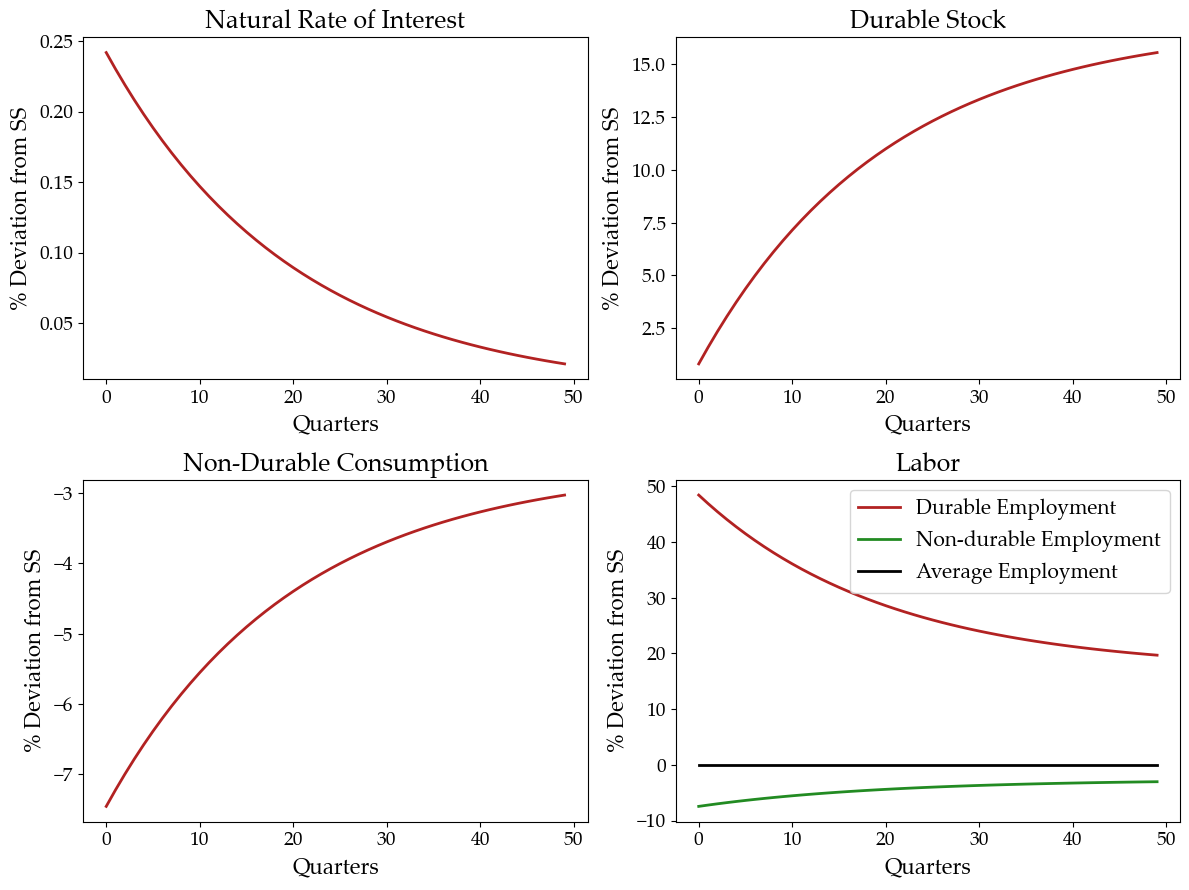

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [3]:
# Ensure LaTeX is not used
rcParams['text.usetex'] = False

# Set the font family to Palatino
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Palatino', 'Palatino Linotype', 'serif']

# Plot transition path for r, D, C in ss deviation from old ss
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
ax[0,0].plot(100*rrelold[0][0:50], label='r', color=(178/255,34/255,34/255), linewidth=2)
ax[0,0].set_title('A. Natural Rate of Interest', fontsize=18)
ax[0,0].set_xlabel('Quarters', fontsize=16)
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].set_ylabel('% Deviation from SS', fontsize=16)
ax[0,1].plot(100*Drelold[0][0:50], label='D', color=(178/255,34/255,34/255), linewidth=2)
ax[0,1].set_title('B. Durable Stock', fontsize=18)
ax[0,1].set_xlabel('Quarters', fontsize=16)
ax[0,1].set_ylabel('% Deviation from SS', fontsize=16)
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].plot(100*Crelold[0][0:50], label='C', color=(178/255,34/255,34/255), linewidth=2)
ax[1,0].set_title('C. Non-Durable Consumption', fontsize=18)
ax[1,0].set_xlabel('Quarters', fontsize=16)
ax[1,0].set_ylabel('% Deviation from SS', fontsize=16)
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].plot(100*Nxrelold[0][0:50], label='Durable Employment', color=(178/255,34/255,34/255), linewidth=2)
ax[1,1].plot(100*Ncrelold[0][0:50], label='Non-durable Employment', color=(34/255, 139/255, 34/255), linewidth=2)
ax[1,1].plot(100*Nrelold[0][0:50], label='Average Employment', color='black', linewidth=2)
ax[1,1].set_title('D. Labor', fontsize=18)
ax[1,1].set_ylabel('% Deviation from SS', fontsize=16)
ax[1,1].legend(fontsize=15)
ax[1,1].set_xlabel('Quarters', fontsize=16)
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()
fig.savefig('noadjcost.eps')

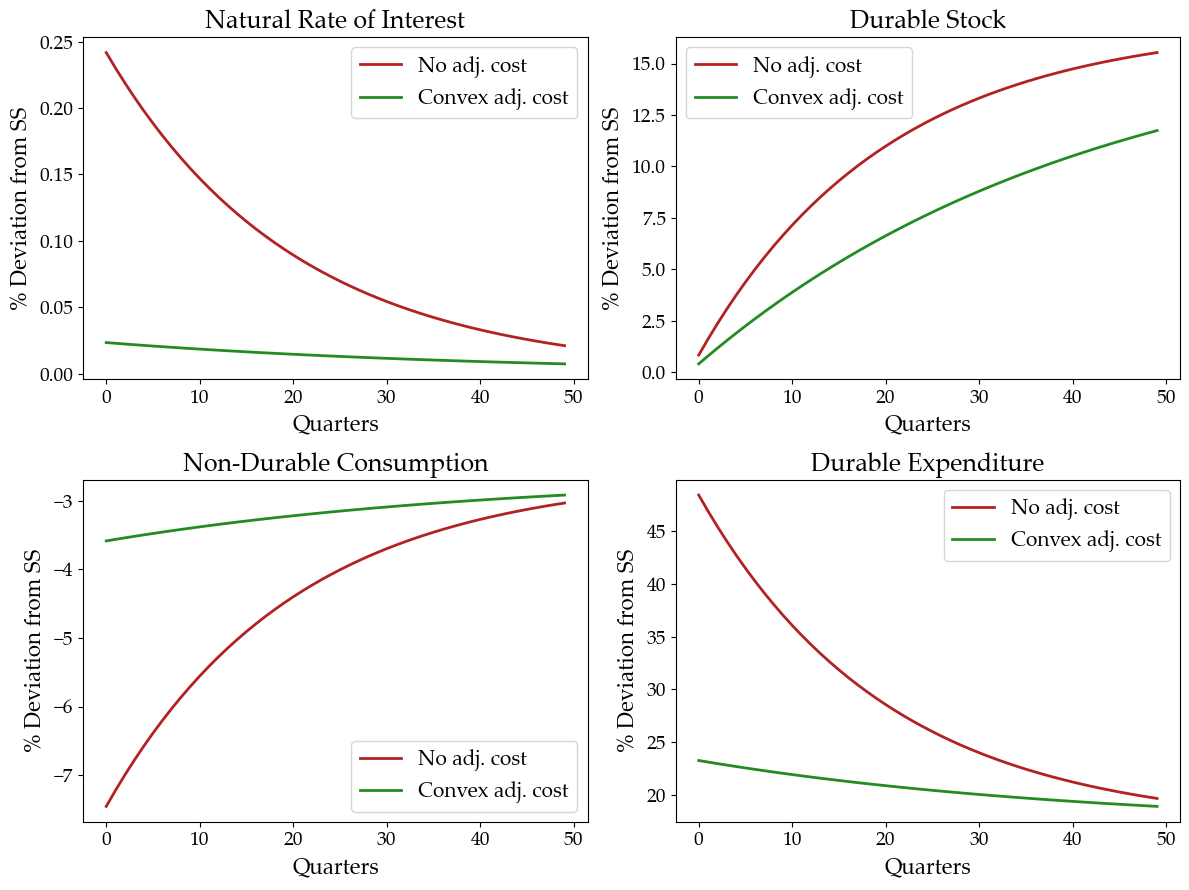

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [4]:
# Plot transition path for r, D, C in ss deviation from old ss
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
ax[0,0].plot(100*rrelold[0][0:50], label='No adj. cost', color=(178/255,34/255,34/255), linewidth=2)
ax[0,0].plot(100*rrelold[0.5][0:50], label='Convex adj. cost', color=(34/255, 139/255, 34/255), linewidth=2)
ax[0,0].set_title('A. Natural Rate of Interest', fontsize=18)
ax[0,0].set_xlabel('Quarters', fontsize=16)
ax[0,0].set_ylabel('% Deviation from SS', fontsize=16)
ax[0,0].legend(fontsize=15)
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].plot(100*Drelold[0][0:50], label='No adj. cost', color=(178/255,34/255,34/255), linewidth=2)
ax[0,1].plot(100*Drelold[0.5][0:50], label='Convex adj. cost', color=(34/255, 139/255, 34/255), linewidth=2)
ax[0,1].set_title('B. Durable Stock', fontsize=18)
ax[0,1].set_xlabel('Quarters', fontsize=16)
ax[0,1].set_ylabel('% Deviation from SS', fontsize=16)
ax[0,1].legend(fontsize=15)
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].plot(100*Crelold[0][0:50], label='No adj. cost', color=(178/255,34/255,34/255), linewidth=2)
ax[1,0].plot(100*Crelold[0.5][0:50], label='Convex adj. cost', color=(34/255, 139/255, 34/255), linewidth=2)
ax[1,0].set_title('C. Non-Durable Consumption', fontsize=18)
ax[1,0].set_xlabel('Quarters', fontsize=16)
ax[1,0].set_ylabel('% Deviation from SS', fontsize=16)
ax[1,0].legend(fontsize=15)
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].plot(100*Xrelold[0][0:50], label='No adj. cost', color=(178/255,34/255,34/255), linewidth=2)
ax[1,1].plot(100*Xrelold[0.5][0:50], label='Convex adj. cost', color=(34/255, 139/255, 34/255), linewidth=2)
ax[1,1].set_title('D. Durable Expenditure', fontsize=18)
ax[1,1].set_xlabel('Quarters', fontsize=16)
ax[1,1].set_ylabel('% Deviation from SS', fontsize=16)
ax[1,1].legend(fontsize=15)
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()
fig.savefig('adjcost.eps')

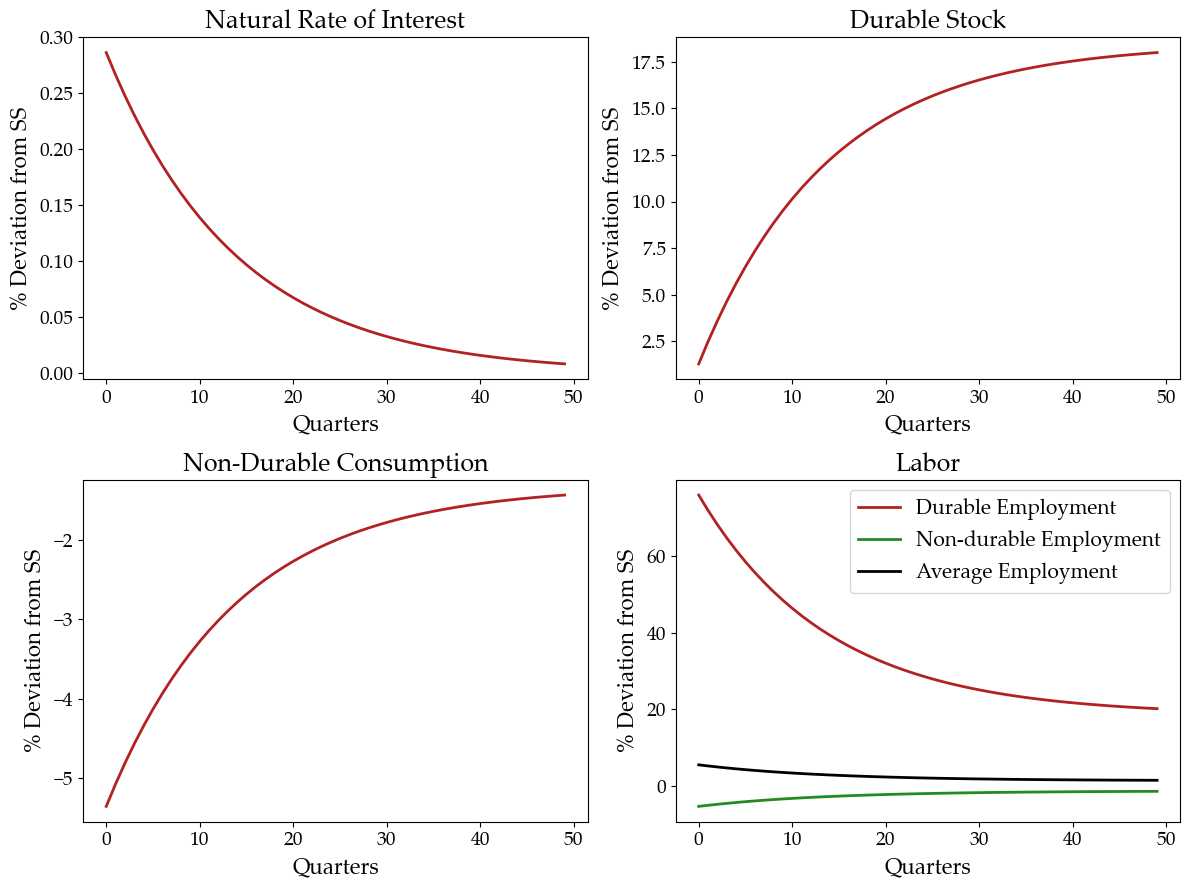

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
# Plot transition path for r, D, C in ss deviation from old ss
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
ax[0,0].plot(100*rrelold_endoN[0][0:50], label='r', color=(178/255,34/255,34/255), linewidth=2)
ax[0,0].set_title('A. Natural Rate of Interest', fontsize=18)
ax[0,0].set_xlabel('Quarters', fontsize=16)
ax[0,0].set_ylabel('% Deviation from SS', fontsize=16)
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].plot(100*Drelold_endoN[0][0:50], label='D', color=(178/255,34/255,34/255), linewidth=2)
ax[0,1].set_title('B. Durable Stock', fontsize=18)
ax[0,1].set_xlabel('Quarters', fontsize=16)
ax[0,1].set_ylabel('% Deviation from SS', fontsize=16)
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].plot(100*Crelold_endoN[0][0:50], label='C', color=(178/255,34/255,34/255), linewidth=2)
ax[1,0].set_title('C. Non-Durable Consumption', fontsize=18)
ax[1,0].set_xlabel('Quarters', fontsize=16)
ax[1,0].set_ylabel('% Deviation from SS', fontsize=16)
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].plot(100*Nxrelold_endoN[0][0:50], label='Durable Employment', color=(178/255,34/255,34/255), linewidth=2)
ax[1,1].plot(100*Ncrelold_endoN[0][0:50], label='Non-durable Employment', color=(34/255, 139/255, 34/255), linewidth=2)
ax[1,1].plot(100*Nrelold_endoN[0][0:50], label='Average Employment', color='black', linewidth=2)
ax[1,1].set_title('D. Labor', fontsize=18) 
ax[1,1].set_ylabel('% Deviation from SS', fontsize=16)
ax[1,1].legend(fontsize=15)
ax[1,1].set_xlabel('Quarters', fontsize=16)
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()
fig.savefig('noadjcost_endoN.eps')

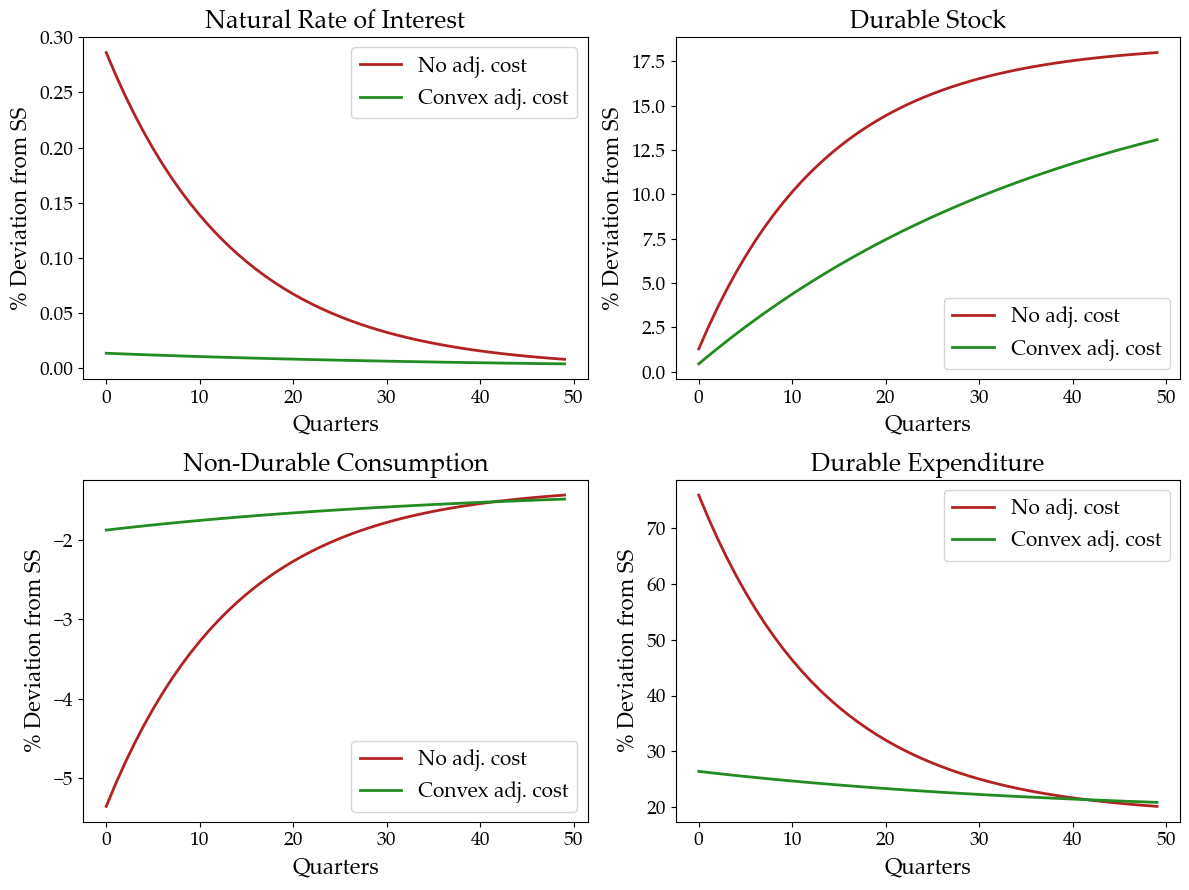

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [6]:
# Plot transition path for r, D, C in ss deviation from old ss
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
ax[0,0].plot(100*rrelold_endoN[0][0:50], label='No adj. cost', color=(178/255,34/255,34/255), linewidth=2)
ax[0,0].plot(100*rrelold_endoN[0.5][0:50], label='Convex adj. cost', color=(34/255, 139/255, 34/255), linewidth=2)
ax[0,0].set_title('A. Natural Rate of Interest', fontsize=18)
ax[0,0].set_xlabel('Quarters', fontsize=16)
ax[0,0].set_ylabel('% Deviation from SS', fontsize=16)
ax[0,0].legend(fontsize=15)
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].plot(100*Drelold_endoN[0][0:50], label='No adj. cost', color=(178/255,34/255,34/255), linewidth=2)
ax[0,1].plot(100*Drelold_endoN[0.5][0:50], label='Convex adj. cost', color=(34/255, 139/255, 34/255), linewidth=2)
ax[0,1].set_title('B. Durable Stock', fontsize=18)
ax[0,1].set_xlabel('Quarters', fontsize=16)
ax[0,1].set_ylabel('% Deviation from SS', fontsize=16)
ax[0,1].legend(fontsize=15)
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].plot(100*Crelold_endoN[0][0:50], label='No adj. cost', color=(178/255,34/255,34/255), linewidth=2)
ax[1,0].plot(100*Crelold_endoN[0.5][0:50], label='Convex adj. cost', color=(34/255, 139/255, 34/255), linewidth=2)
ax[1,0].set_title('C. Non-Durable Consumption', fontsize=18)
ax[1,0].set_xlabel('Quarters', fontsize=16)
ax[1,0].set_ylabel('% Deviation from SS', fontsize=16)
ax[1,0].legend(fontsize=15)
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].plot(100*Xrelold_endoN[0][0:50], label='No adj. cost', color=(178/255,34/255,34/255), linewidth=2)
ax[1,1].plot(100*Xrelold_endoN[0.5][0:50], label='Convex adj. cost', color=(34/255, 139/255, 34/255), linewidth=2)
ax[1,1].set_title('D. Durable Expenditure', fontsize=18)
ax[1,1].set_xlabel('Quarters', fontsize=16)
ax[1,1].set_ylabel('% Deviation from SS', fontsize=16)
ax[1,1].legend(fontsize=15)
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()
fig.savefig('adjcost_endoN.eps')

In [9]:
Drelold_endoN[0][-1]

0.18494384370759695